In [4]:
from ssl import DER_cert_to_PEM_cert
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
# Read the input image
img = cv2.imread('rock.jpg')

def detect_face(img):
  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  # Draw rectangle around the faces and crop the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = gray[y:y + h, x:x + w]
    
  # Display the output
  # plt.imshow(faces)
  # cv2.waitKey()
  return faces

detect_face(img)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 145, ..., 159, 158,   0],
       ...,
       [  0,   0, 184, ..., 143, 167,   0],
       [  0,   0, 183, ...,  78, 151,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [6]:
def prepare_training_data(training_data_folder_path):
  detected_faces = []
  face_labels = []
  total_pics = 0
  training_large_dirs = os.listdir(training_data_folder_path)

  for dir_name in training_large_dirs:

    # label = int(dir_name)

    training_image_path = training_data_folder_path+"/"+dir_name

    training_images_names = os.listdir(training_image_path)

    for image_name in training_images_names:
      # if(total_pics == 10):
      #   break
      total_pics+=1
      image_path = training_image_path + "/" + image_name
      print(image_path)

      image = cv2.imread(image_path) 

      # face, rect = detect_face(image)
      face = detect_face(image)
      if(len(face) == 0):
        continue

      # resized_face = cv2.resize(face, (120, 120), interpolation = cv2.INTER_AREA)
      
      resized_face = cv2.resize(face, (120, 120))
      detected_faces.append(resized_face)
      face_labels.append(dir_name)
  print(len(detected_faces))
  print(total_pics)
  return detected_faces, face_labels

In [7]:
detected_faces, face_labels = prepare_training_data("mlData")
print(detected_faces,face_labels)

mlData/anthony davis/0f250-15476020684137-500.jpg
mlData/anthony davis/132484-obyhjqreqi-1575890708.jpg
mlData/anthony davis/1583300914_anthony-davis-la-phi.jpg
mlData/anthony davis/220px-Anthony_Davis_12711093105.jpg
mlData/anthony davis/2d52d7603d818e3f36c48b9abc002ab4.jpg
mlData/anthony davis/48866_21122018APUSAP_1548717557894.jpg
mlData/anthony davis/785996aa9bb64685acf94eea5cff8277.jpg
mlData/anthony davis/870187-83155-qbgtrihieb-1519725804.jpg
mlData/anthony davis/anthony-davis-iso-shoots-1010-ahs.jpg
mlData/anthony davis/Anthony-Davis0.jpg
mlData/anthony davis/anthonydavis-1.jpg
mlData/anthony davis/AnthonyDavis2012NBARookiePhotoShootRNyQEqG99qal.jpg
mlData/anthony davis/Anthony_Davis_283846401421429.jpg
mlData/anthony davis/images27.jpg
mlData/anthony davis/images28.jpg
mlData/anthony davis/images29.jpg
mlData/anthony davis/lakerscreditunion_630_354_80_s_c1.jpg
mlData/anthony davis/maxresdefault0.jpg
mlData/anthony davis/merlin_150449823_e3d772b6-4db2-4eba-8875-8f0356db66be-sup

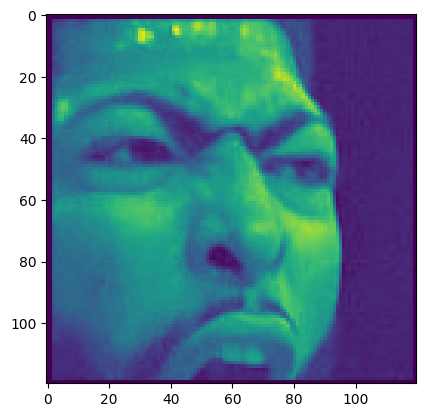

In [8]:
plt.imshow(detected_faces[2])

In [9]:
from sklearn import decomposition

# print(detected_faces)
detected_faces = np.array(detected_faces)
print(detected_faces.shape)

# X = flattened faces
X = []
for i in range(len(detected_faces)):
    X.append(detected_faces[i].flatten())
X = np.array(X)
print(X.shape)
# print(flattened_faces)
pca = decomposition.PCA(n_components = 80)
pca.fit(X)

Y = pca.transform(X)
print('Y shape',Y.shape)

# unessesary
xhat = pca.inverse_transform(Y)
print(xhat)
print(xhat.shape)

(155, 120, 120)
(155, 14400)
Y shape (155, 80)
[[ -6.27780683  -6.32038581  -6.68215526 ...   5.31491701   7.22617184
    7.80190474]
 [  6.28459418   5.18453926   7.40852874 ...   6.512833     4.50377856
    1.53406958]
 [ -0.39268651  -0.30781556  -2.39609658 ...  -9.16307343  -7.92913278
   -4.55763965]
 ...
 [ -2.60649013  -3.18162534  -3.67578078 ... -12.35761741  -9.16494492
   -9.63163404]
 [ -8.29749813  -7.42519242  -7.04959122 ...   6.15024184   5.0575565
    4.28904119]
 [  1.91919306   4.01074583   2.14223544 ...  73.47539336  74.64030068
   56.30666515]]
(155, 14400)


(14400,)


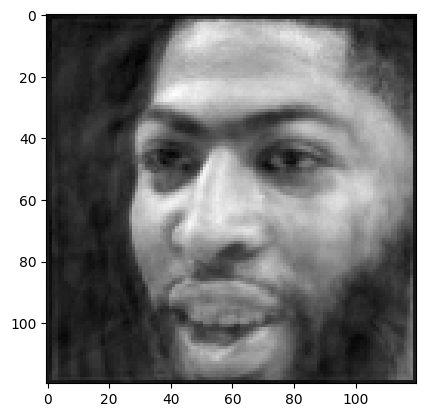

In [10]:
pic = xhat[0]
print(pic.shape)
pic = np.array(pic)
pic = pic.reshape(120,120)
plt.imshow(pic, cmap='gray')

In [11]:
test_faces, test_labels = prepare_training_data("test_data")

test_data/anthony davis/images25.jpg
test_data/anthony davis/images26.jpg
test_data/chris paul/chris-paul-3.jpg
test_data/chris paul/chris-paul-rockets-Cropped.jpg
test_data/james harden/images4.jpg
test_data/james harden/images6.jpg
test_data/jimmy buttler/1fa56-15437217415914-500.jpg
test_data/jimmy buttler/Butler-76ers-NBA-1046533.jpg
test_data/kevin durant/17kevin.jpg
test_data/kevin durant/920x920.jpg
test_data/kyrie irving/123445-nkwifxxacu-1562571391.jpg
test_data/kyrie irving/Kyrie_Irving_during_the_2016_NBA_Champions_victory_parade.jpg
test_data/lebron/AP20120853090391.jpg
test_data/lebron/bron-2.jpg
test_data/luka doncic/15455696902843.jpg
test_data/luka doncic/images7.jpg
test_data/stephen curry/160313152805-nba-steve-smith-intv-don-riddell-00043029-exlarge-169.jpg
test_data/stephen curry/BNG-L-WARRIORS-0422-9.jpg
test_data/trae young/images.jpg
test_data/trae young/Trae-Young3.jpg
test_data/westbrook/files-basket-nba_1f21a45c-55ec-11e9-8bc0-bee180be535f.jpg
test_data/westbr

In [12]:
test_faces = np.array(test_faces)
print(test_faces.shape)

# X = flattened faces
test_X = []
for i in range(len(test_faces)):
    test_X.append(test_faces[i].flatten())
test_X = np.array(test_X)
print(test_X.shape)

test_Y = pca.transform(test_X)

(17, 120, 120)
(17, 14400)


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# import seaborn as sns


In [14]:
k=7
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Y, face_labels)
    
    training_score = knn.score(test_Y, test_labels)
    # training_score = knn.predict(test_Y)
    print('k =',k,training_score)
    return training_score

k = 1 0.4117647058823529
k = 2 0.23529411764705882
k = 3 0.29411764705882354
k = 4 0.35294117647058826
k = 5 0.35294117647058826
k = 6 0.29411764705882354
k = 7 0.23529411764705882
k = 8 0.29411764705882354
[0.4117647058823529, 0.23529411764705882, 0.29411764705882354, 0.35294117647058826, 0.35294117647058826, 0.29411764705882354, 0.23529411764705882, 0.29411764705882354]


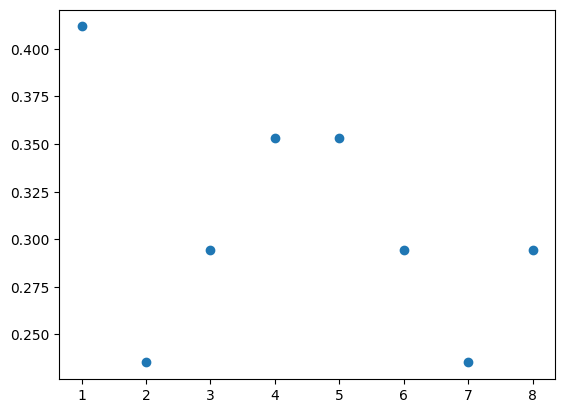

In [15]:
y=[]
x=[]
for i in range(1,9):
    y.append(KNN(i))
    x.append(i)
print(y)
plt.scatter(x, y)
plt.show()